
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

## GRUPO 8
---
## Trabajo práctico entregable - Parte 1


In [ ]:
#Importamos librerías
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import *
import matplotlib.pyplot as plt
from scipy import stats

sns.set_context('talk')

In [ ]:
#Lectura de la base de datos
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)
pd.options.display.float_format = '{:,.3f}'.format

#Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?

Para ello:

1.1 Seleccionar columnas relevantes para conocer cuales son los lenguajes de programación que tienen mayor salario


In [ ]:
#Inspeccionar columnas que hay en la base de datos
columns = df.columns.tolist()
#columns

In [ ]:
##Columnas relevantes(pensando en el punto 1.2 del Práctico)
relevant_columns = ['salary_monthly_NETO', 'tools_programming_languages','profile_gender','work_contract_type','profile_studies_level','company_employee_number','work_people_in_charge_of','salary_monthly_BRUTO','work_years_in_company']

#Nuevo df con columnas relevantes seleccionadas
df1 = df[relevant_columns]
df1[:5]

,salary_monthly_NETO,tools_programming_languages,profile_gender,work_contract_type,profile_studies_level,company_employee_number,work_people_in_charge_of,salary_monthly_BRUTO,work_years_in_company
0,"43,000.000",Ninguno,Mujer,Full-Time,Universitario,501-1000,0,"53,000.000",3.000
1,"63,000.000","HTML, Javascript, Python",Hombre,Full-Time,Universitario,201-500,4,"79,000.000",2.000
2,"127,000.000",Ninguno,Mujer,Full-Time,Secundario,2001-5000,0,"160,000.000",0.000
3,"102,000.000","Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",Hombre,Full-Time,Posgrado,501-1000,5,"130,000.000",15.000
4,"106,000.000","CSS, HTML, Javascript, SQL, TypeScript",Hombre,Full-Time,Universitario,11-50,0,"140,000.000",6.000


1.2 Seleccionar filas relevantes. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. 

Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.


In [ ]:
#Separamos las filas que tienen más de un lenguaje en la misma fila sin perder la info de salario mensual neto (están separadas por comas)

#Split tools_programming_languages
df1.tools_programming_languages = df1.tools_programming_languages.str.split(',')

# Explode the column
df1 = df1.explode('tools_programming_languages').reset_index(drop=True)
df1[:5]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,salary_monthly_NETO,tools_programming_languages,profile_gender,work_contract_type,profile_studies_level,company_employee_number,work_people_in_charge_of,salary_monthly_BRUTO,work_years_in_company
0,"43,000.000",Ninguno,Mujer,Full-Time,Universitario,501-1000,0,"53,000.000",3.000
1,"63,000.000",HTML,Hombre,Full-Time,Universitario,201-500,4,"79,000.000",2.000
2,"63,000.000",Javascript,Hombre,Full-Time,Universitario,201-500,4,"79,000.000",2.000
3,"63,000.000",Python,Hombre,Full-Time,Universitario,201-500,4,"79,000.000",2.000
4,"127,000.000",Ninguno,Mujer,Full-Time,Secundario,2001-5000,0,"160,000.000",0.000


In [ ]:
#Limpiar la base de la columna tools_programming_languages de los posibles errores que se esten incluyendo

#Hay filas que quedaron con espacios por lo tanto se quitarán estos:
df1['tools_programming_languages'] = df1['tools_programming_languages'].str.replace(' ','')

#Inspecciono que variables contiene la columna tools_programming_languages
_tools_prog_lang = df1[['tools_programming_languages']]
_tools_prog_lang = _tools_prog_lang.drop_duplicates().sort_values(by=['tools_programming_languages'])
_tools_prog_lang = _tools_prog_lang['tools_programming_languages'].tolist()

#Algunas valores que podemos determinar que son erroneos y omitirlos para esta variable son: 
_omitir = ['.NET no es un lenguaje!',' HTML y CSS no son  lenguajes de programación',' laburo pedorro donde no aprendo ni puedo usar nada interesante','-','.','laburopedorrodondenoaprendonipuedousarnadainteresante']
df1 = df1[~df1['tools_programming_languages'].isin(_omitir)]

#Todos los que empiezan con "n/N" refieren a variables que se deben sacar
_no_aplica = (df1['tools_programming_languages'].str.startswith('N'))|df1['tools_programming_languages'].str.startswith('n')
df1 = df1[~df1['tools_programming_languages'].isin(_no_aplica)]

#Drop nan
df1 = df1.dropna(subset=['tools_programming_languages'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18558 entries, 0 to 18563
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   salary_monthly_NETO          17885 non-null  float64
 1   tools_programming_languages  18558 non-null  object 
 2   profile_gender               18558 non-null  object 
 3   work_contract_type           18558 non-null  object 
 4   profile_studies_level        18558 non-null  object 
 5   company_employee_number      18558 non-null  object 
 6   work_people_in_charge_of     18558 non-null  int64  
 7   salary_monthly_BRUTO         18558 non-null  float64
 8   work_years_in_company        18558 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.4+ MB


1.2.1  Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.


In [ ]:
#Obtengo la frecuencia con la que aparecen los lenguajes
_freq_languages = df1.tools_programming_languages.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'Lenguaje de Programación', 'tools_programming_languages': 'Frecuencia'})

#Filtro los primeros 5 (son los que tienen una frecuencia mayor a 1000 aprox)
_freq_languages_filter = _freq_languages.head(5)
_freq_languages_filter

,Lenguaje de Programación,Frecuencia
0,Javascript,2513
1,SQL,2153
2,HTML,1860
3,Python,1474
4,Java,1453


No handles with labels found to put in legend.


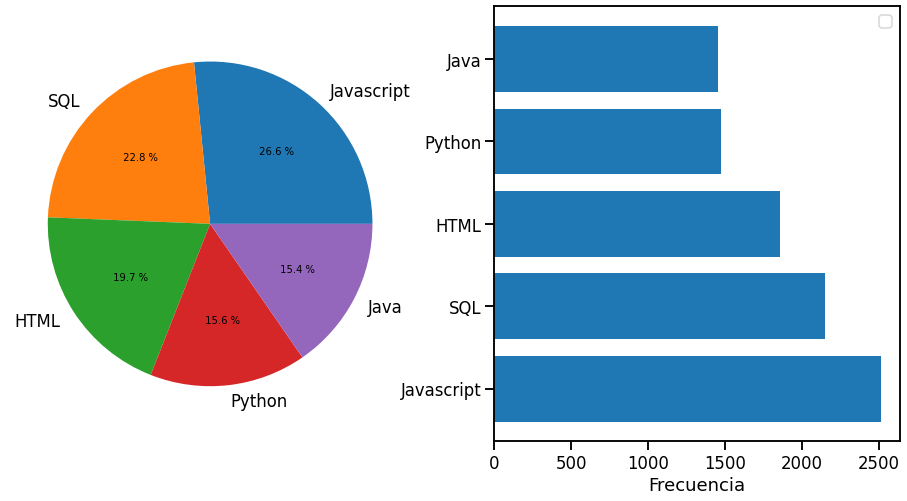

In [ ]:
#Representamos la frecuencia obtenida para los Lenguajes de Programación más utilizados (aprox 90% de la muestra)

#Gráfico de Torta (izquierda)
fig, axs = plt.subplots(ncols= 2, figsize=(16, 8))
plt.subplot(121)
pie = plt.pie (_freq_languages_filter["Frecuencia"], labels= _freq_languages_filter["Lenguaje de Programación"], 
autopct = '% 1.1f %%')

#Gráfico de Barras Horizontales (derecha)
plt.subplot(122)
bar = plt.barh(_freq_languages_filter["Lenguaje de Programación"],_freq_languages_filter["Frecuencia"])
plt.xlabel("Frecuencia")

plt.legend()
plt.show()

In [ ]:
#Me quedo con los 5 lenguajes de programación que más veces figuran
_languages = _freq_languages_filter[['Lenguaje de Programación']]
_languages = _languages['Lenguaje de Programación'].tolist()

#Filtro la base de datos con estos 5 lenguajes
_df_filter = df1[df1['tools_programming_languages'].isin(_languages)]
_df_filter[:5]

,salary_monthly_NETO,tools_programming_languages,profile_gender,work_contract_type,profile_studies_level,company_employee_number,work_people_in_charge_of,salary_monthly_BRUTO,work_years_in_company
1,"63,000.000",HTML,Hombre,Full-Time,Universitario,201-500,4,"79,000.000",2.000
2,"63,000.000",Javascript,Hombre,Full-Time,Universitario,201-500,4,"79,000.000",2.000
3,"63,000.000",Python,Hombre,Full-Time,Universitario,201-500,4,"79,000.000",2.000
8,"102,000.000",HTML,Hombre,Full-Time,Posgrado,501-1000,5,"130,000.000",15.000
9,"102,000.000",Java,Hombre,Full-Time,Posgrado,501-1000,5,"130,000.000",15.000


1.2.2 Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis


In [ ]:
#Obtengo la frecuencia con la que aparecen los tipos de contratos
_freq_contratos = _df_filter.work_contract_type.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'Tipo Contrato', 'work_contract_type': 'Frecuencia'})

#Seleccionamos los tipos de contrato de Full-Time y Part-Time por ser los que más frecuencia poseen.
_freq_contratos = _freq_contratos[['Tipo Contrato']][:2]
_freq_contratos = _freq_contratos['Tipo Contrato'].tolist()
_df_filter = _df_filter[_df_filter['work_contract_type'].isin(_freq_contratos)]

#Para determinar un limite inferior utilizamos el Salario Minimo Vital y Movil de Argentina
m_fulltime = 23544
sm_parttime = (23544/8)*4 #(hay que considerar la mitad de la carga horaria laboral por ser part-time)

#Filtramos dataframe para full-time y part-time según la condición anterior
_df_filter['filtro_full'] = np.where(_df_filter['work_contract_type']=='Full-Time',
                                     np.where(_df_filter['salary_monthly_NETO'] >= m_fulltime,1,0),
                                     np.where(_df_filter['salary_monthly_NETO'] >= sm_parttime,1,0))
_df_filter_min = _df_filter[_df_filter['filtro_full']==1]
_df_filter_min = _df_filter_min.sort_values(by=['salary_monthly_NETO'])
_df_filter_min = _df_filter_min.drop(columns=['filtro_full'])

_df_filter_min[:3]

,salary_monthly_NETO,tools_programming_languages,profile_gender,work_contract_type,profile_studies_level,company_employee_number,work_people_in_charge_of,salary_monthly_BRUTO,work_years_in_company
5691,"12,000.000",Java,Hombre,Part-Time,Universitario,1-10,0,"15,000.000",1.000
5692,"12,000.000",SQL,Hombre,Part-Time,Universitario,1-10,0,"15,000.000",1.000
11803,"13,500.000",SQL,Hombre,Part-Time,Universitario,11-50,1,"16,000.000",2.000


In [ ]:
#Detección de outliers a través de IQR score
q1 = _df_filter_min["salary_monthly_NETO"].quantile(0.25) # 25 percentil / 1 quartil
q3 = _df_filter_min["salary_monthly_NETO"].quantile(0.75) # 75 percentil / 3 quartil
#Rango inter
iqr = q3-q1
#Valor mínimo  y maximo del boxplot
minimo_wn  = q1-1.5*iqr 
maximo_wn = q3+1.5*iqr 
#Filtrar salarios outliers
_salary = _df_filter_min[['salary_monthly_NETO']]
_condition = (_salary['salary_monthly_NETO'] < minimo_wn) |(_salary['salary_monthly_NETO'] > maximo_wn)
df_iqr_score = _df_filter_min[_condition]
#Me castiga mucho la muestra

In [ ]:
#Otra forma de detectar outliers (nos quedamos con esta)
#Desv std * num. de DS
sd_wn = (2.5 * _df_filter_min["salary_monthly_NETO"].std())
#Promedio
media_wn=(_df_filter_min["salary_monthly_NETO"].mean())
#Limites inferior y superior
sd_highlim = media_wn+sd_wn
sd_lowlim = media_wn-sd_wn
#Filtro DataFrame
df_wn = _df_filter_min[(_df_filter_min["salary_monthly_NETO"]<=(sd_highlim)) & (_df_filter_min["salary_monthly_NETO"]>=(sd_lowlim))]
df_wn[:3]

,salary_monthly_NETO,tools_programming_languages,profile_gender,work_contract_type,profile_studies_level,company_employee_number,work_people_in_charge_of,salary_monthly_BRUTO,work_years_in_company
5691,"12,000.000",Java,Hombre,Part-Time,Universitario,1-10,0,"15,000.000",1.000
5692,"12,000.000",SQL,Hombre,Part-Time,Universitario,1-10,0,"15,000.000",1.000
11803,"13,500.000",SQL,Hombre,Part-Time,Universitario,11-50,1,"16,000.000",2.000


3.1 Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas.

Opción I: Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.

- Análisis Global de los Lenguaje de Programación (para la base filtrada)



In [ ]:
#Obtengo el describe de salario neto mensual por cada lenguaje de programacion
_global = df_wn[['tools_programming_languages','salary_monthly_NETO']]
_global = _global.groupby(['tools_programming_languages']).describe().round().reset_index()
_global

tools_programming_languages salary_monthly_NETO  ...                        
                                            count  ...         75%         max
0                        HTML           1,495.000  ...  98,000.000 240,000.000
1                        Java           1,234.000  ... 113,750.000 240,000.000
2                  Javascript           2,003.000  ... 102,000.000 248,000.000
3                      Python           1,210.000  ... 111,095.000 248,000.000
4                         SQL           1,784.000  ... 100,000.000 240,000.000

[5 rows x 9 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

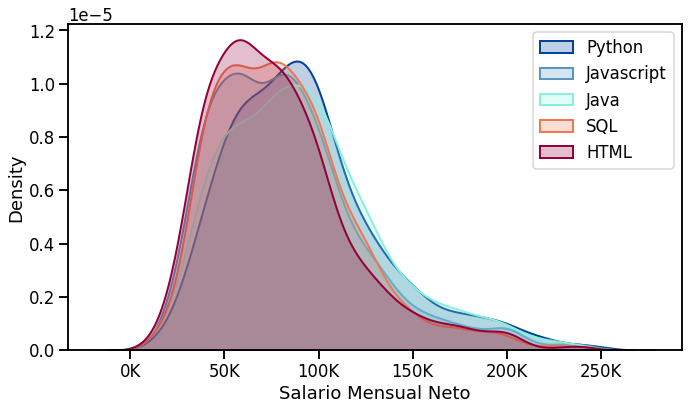

In [ ]:
#Distribución de densidad de los salarios mensual neto por lenguaje de programación
sns.set_color_codes("deep")
fig= plt.figure(figsize = (11, 6))
g2 = sns.distplot(a = df_wn[df_wn["tools_programming_languages"] == "Python"]["salary_monthly_NETO"], hist = False, rug = False, color = "#00429d",kde_kws = {'shade': True, 'linewidth': 2},label = "Python")
g2 = sns.distplot(a = df_wn[df_wn["tools_programming_languages"] == "Javascript"]["salary_monthly_NETO"],hist = False,rug= False,color= "#5b95be", kde_kws = {'shade': True, 'linewidth': 2},label = "Javascript")
g2 = sns.distplot(a = df_wn[df_wn["tools_programming_languages"] == "Java"]["salary_monthly_NETO"], hist = False, rug  = False, color = "#88f0dc",kde_kws = {'shade': True, 'linewidth': 2},label = "Java")
g2 = sns.distplot(a = df_wn[df_wn["tools_programming_languages"] == "SQL"]["salary_monthly_NETO"],hist = False,rug = False,color = "#ee7851",kde_kws = {'shade': True, 'linewidth': 2},label = "SQL")
g2 = sns.distplot(a = df_wn[df_wn["tools_programming_languages"] == "HTML"]["salary_monthly_NETO"], hist = False, rug = False, color = "#93003a",kde_kws = {'shade': True, 'linewidth': 2},label = "HTML")
g2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in g2.get_xticks()/1000])#x format
g2.set_xlabel("Salario Mensual Neto")
plt.legend()



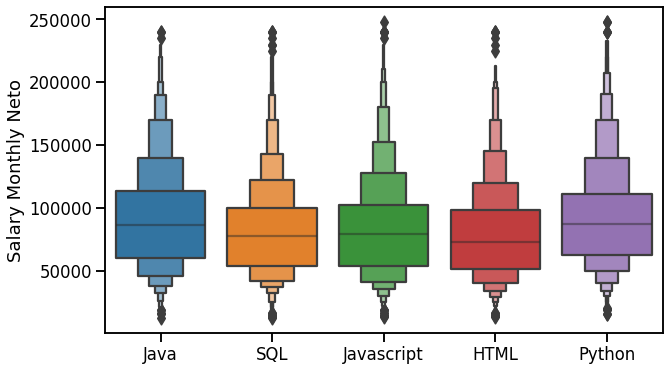

In [ ]:
plt.figure(figsize=(10, 6))
_rename_2 = df_wn.rename(columns={'salary_monthly_NETO':'Salary Monthly Neto','tools_programming_languages':''})
sns.boxenplot(y="Salary Monthly Neto", x="", data=_rename_2,orient="v")
plt.ticklabel_format(style='plain', axis='y')

#Conclusión:
¿Cuáles son los lenguajes de programación asociados a los mejores salarios?
 * Los lenguajes de programación con mejores salarios corresponden a Python, Javascript, Java, SQL y HTML.

 *  A simple vista podemos clasificar los 5 lenguajes de programación seleccionados en dos categorías. En donde la primera categoría se encuentran Python y Java como lenguajes de programación que poseen en términos relativos un salario mensual neto mayor respecto a los otros 3. En la segunda categoría se pueden agrupar los lenguajes de Javascript, SQL y HTML.




ANEXO - Análisis Individual para cada Lenguaje de Programación  (comparación de base sin filtro vs con filtro)

A. Python

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0, '0K'),
 Text(0, 0, '50K'),
 Text(0, 0, '100K'),
 Text(0, 0, '150K'),
 Text(0, 0, '200K'),
 Text(0, 0, '250K'),
 Text(0, 0, '300K')]

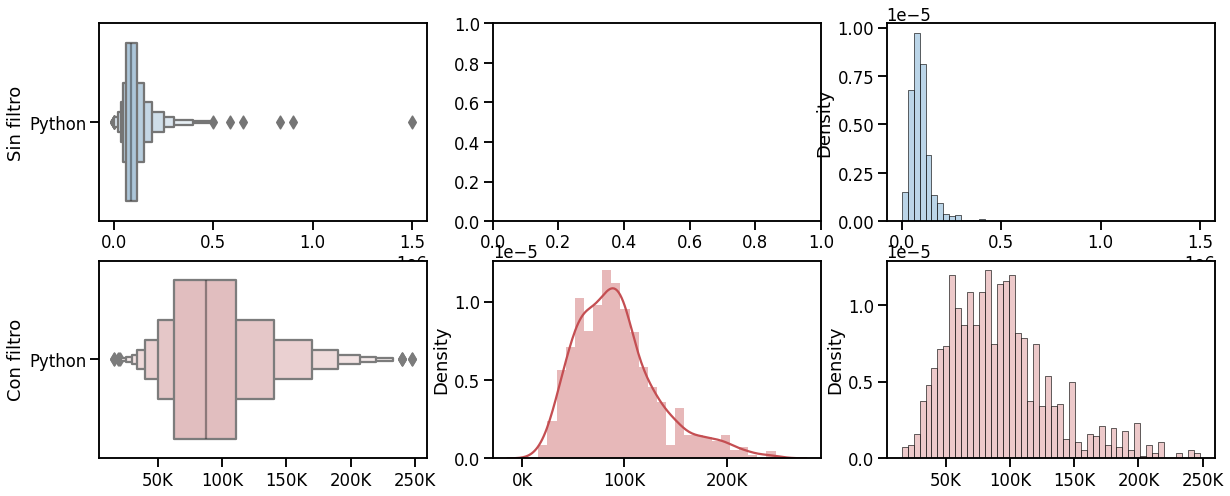

In [ ]:
#A.1 Muestra sin ningun filtro (azul)
_python = _df_filter[_df_filter['tools_programming_languages']=='Python']
_python = _python.rename(columns={'salary_monthly_NETO':'Salary Monthly Neto','tools_programming_languages':'Sin filtro'})
#A.2 Muestra filtrada por smvym y sin outliers (rojo)
_python_s = df_wn[df_wn['tools_programming_languages']=='Python']
_python_s = _python_s.rename(columns={'salary_monthly_NETO':'Salary Monthly Neto','tools_programming_languages':'Con filtro'})
#Gráfico Seaborn
sns.set_color_codes("deep")
fig, axes = plt.subplots(figsize=(20, 8), ncols=3, nrows=2)

g1 = sns.boxenplot(x=_python["Salary Monthly Neto"],y=_python['Sin filtro'],ax=axes[0,0], color ='#A4C7E1')
g1.set(xlabel=None)  # remove the axis label
g1 = sns.histplot(x=_python['Salary Monthly Neto'], color='#A4C7E1', bins=50,ax=axes[0,2], legend=False,stat='density')
g1.set(xlabel=None)  # remove the axis label

g2 = sns.boxenplot(x=_python_s["Salary Monthly Neto"],y=_python_s['Con filtro'],ax=axes[1,0], color ='#E7B8B9')
g2.set(xlabel=None)  # remove the axis label
g2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in g2.get_xticks()/1000]) #x format
g2 = sns.distplot(x=_python_s[['Salary Monthly Neto']],ax=axes[1,1], color ='r')
g2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in g2.get_xticks()/1000])#x format
g2 = sns.histplot(x=_python_s['Salary Monthly Neto'], color='#E7B8B9', bins=50,ax=axes[1,2], legend=False,stat='density')
g2.set(xlabel=None)  # remove the axis label
g2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in g2.get_xticks()/1000])#x format

In [ ]:
#Estadistica desciptiva del salario mensual neto para python
_python = _python.rename(columns={'Salary Monthly Neto':'Sin filtros'})
_python = _python[['Sin filtros']].describe().round()
_python_s = _python_s.rename(columns={'Salary Monthly Neto':'Con filtros'})
_python_s = _python_s[['Con filtros']].describe().round()
_python['Con filtros'] = _python_s['Con filtros']
_python

,Sin filtros,Con filtros
count,"1,288.000","1,210.000"
mean,"99,531.000","92,596.000"
std,"79,040.000","41,262.000"
min,37.000,"15,600.000"
25%,"60,875.000","62,500.000"
50%,"87,000.000","87,000.000"
75%,"115,000.000","111,095.000"
max,"1,500,000.000","248,000.000"


B. Javascript

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0, '0K'),
 Text(0, 0, '50K'),
 Text(0, 0, '100K'),
 Text(0, 0, '150K'),
 Text(0, 0, '200K'),
 Text(0, 0, '250K'),
 Text(0, 0, '300K')]

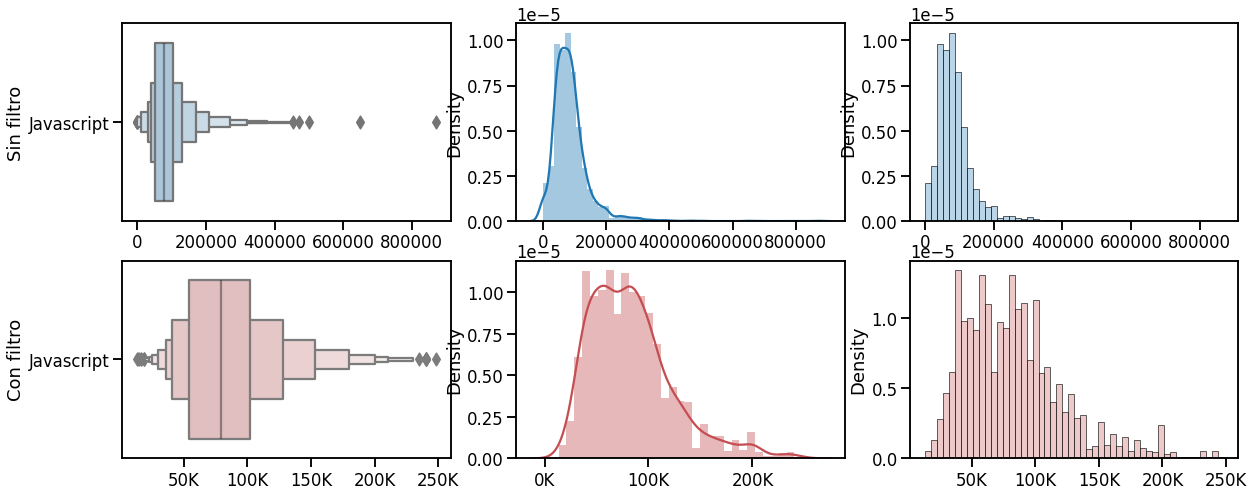

In [ ]:
#B.1 Muestra sin ningun filtro (azul)
_javascript = _df_filter[_df_filter['tools_programming_languages']=='Javascript']
_javascript = _javascript.rename(columns={'salary_monthly_NETO':'Salary Monthly Neto','tools_programming_languages':'Sin filtro'})
#B.2 Muestra filtrada por smvym y sin outliers (rojo)
_javascript_s = df_wn[df_wn['tools_programming_languages']=='Javascript']
_javascript_s = _javascript_s.rename(columns={'salary_monthly_NETO':'Salary Monthly Neto','tools_programming_languages':'Con filtro'})
#Gráfico Seaborn
sns.set_color_codes("deep")
fig, axes = plt.subplots(figsize=(20, 8), ncols=3, nrows=2)

g1 = sns.boxenplot(x=_javascript["Salary Monthly Neto"],y=_javascript['Sin filtro'],ax=axes[0,0], color ='#A4C7E1')
g1.set(xlabel=None)  # remove the axis label
g1 = sns.distplot(x=_javascript[['Salary Monthly Neto']],ax=axes[0,1])
g1 = sns.histplot(x=_javascript['Salary Monthly Neto'], color='#A4C7E1', bins=50,ax=axes[0,2], legend=False,stat='density')
g1.set(xlabel=None)  # remove the axis label

g2 = sns.boxenplot(x=_javascript_s["Salary Monthly Neto"],y=_javascript_s['Con filtro'],ax=axes[1,0], color ='#E7B8B9')
g2.set(xlabel=None)  # remove the axis label
g2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in g2.get_xticks()/1000]) #x format
g2 = sns.distplot(x=_javascript_s[['Salary Monthly Neto']],ax=axes[1,1], color ='r')
g2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in g2.get_xticks()/1000])#x format
g2 = sns.histplot(x=_javascript_s['Salary Monthly Neto'], color='#E7B8B9', bins=50,ax=axes[1,2], legend=False,stat='density')
g2.set(xlabel=None)  # remove the axis label
g2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in g2.get_xticks()/1000])#x format

In [ ]:
#Estadistica desciptiva del salario mensual neto para javascript
_javascript = _javascript.rename(columns={'Salary Monthly Neto':'Sin filtros'})
_javascript = _javascript[['Sin filtros']].describe().round()
_javascript_s = _javascript_s.rename(columns={'Salary Monthly Neto':'Con filtros'})
_javascript_s = _javascript_s[['Con filtros']].describe().round()
_javascript['Con filtros'] = _javascript_s['Con filtros']
_javascript

,Sin filtros,Con filtros
count,"2,129.000","2,003.000"
mean,"86,034.000","83,439.000"
std,"58,196.000","40,055.000"
min,13.000,"13,500.000"
25%,"51,000.000","54,000.000"
50%,"78,000.000","79,000.000"
75%,"104,600.000","102,000.000"
max,"870,000.000","248,000.000"


C. JAVA


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0, '0K'),
 Text(0, 0, '50K'),
 Text(0, 0, '100K'),
 Text(0, 0, '150K'),
 Text(0, 0, '200K'),
 Text(0, 0, '250K'),
 Text(0, 0, '300K')]

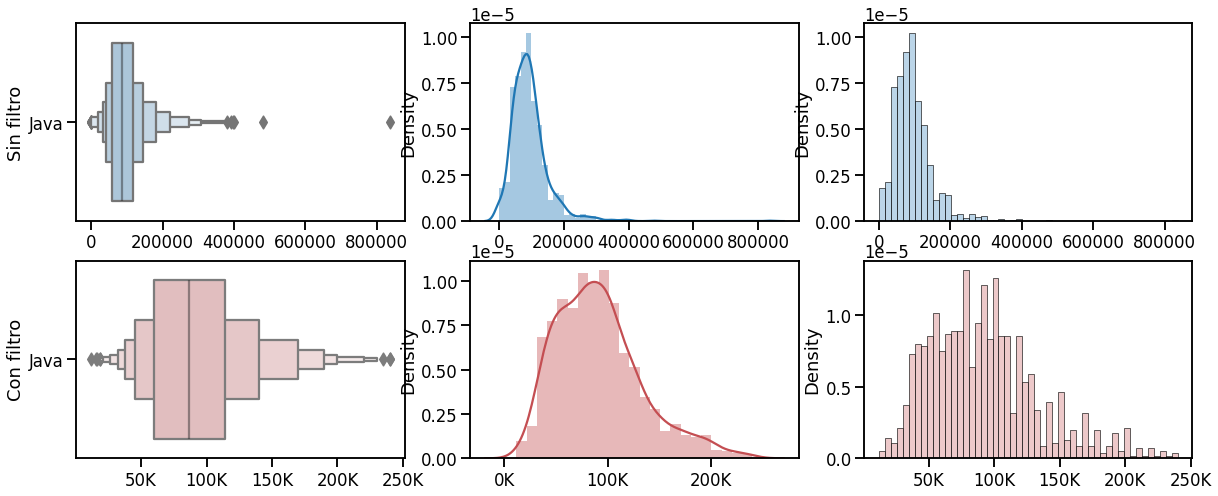

In [ ]:
#C.1 Muestra sin ningun filtro (azul)
_java = _df_filter[_df_filter['tools_programming_languages']=='Java']
_java = _java.rename(columns={'salary_monthly_NETO':'Salary Monthly Neto','tools_programming_languages':'Sin filtro'})
#C.2 Muestra filtrada por smvym y sin outliers (rojo)
_java_s = df_wn[df_wn['tools_programming_languages']=='Java']
_java_s = _java_s.rename(columns={'salary_monthly_NETO':'Salary Monthly Neto','tools_programming_languages':'Con filtro'})
#Gráfico Seaborn
sns.set_color_codes("deep")
fig, axes = plt.subplots(figsize=(20, 8), ncols=3, nrows=2)

g1 = sns.boxenplot(x=_java["Salary Monthly Neto"],y=_java['Sin filtro'],ax=axes[0,0], color ='#A4C7E1')
g1.set(xlabel=None)  # remove the axis label
g1 = sns.distplot(x=_java[['Salary Monthly Neto']],ax=axes[0,1])
g1 = sns.histplot(x=_java['Salary Monthly Neto'], color='#A4C7E1', bins=50,ax=axes[0,2], legend=False,stat='density')
g1.set(xlabel=None)  # remove the axis label

g2 = sns.boxenplot(x=_java_s["Salary Monthly Neto"],y=_java_s['Con filtro'],ax=axes[1,0], color ='#E7B8B9')
g2.set(xlabel=None)  # remove the axis label
g2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in g2.get_xticks()/1000]) #x format
g2 = sns.distplot(x=_java_s[['Salary Monthly Neto']],ax=axes[1,1], color ='r')
g2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in g2.get_xticks()/1000])#x format
g2 = sns.histplot(x=_java_s['Salary Monthly Neto'], color='#E7B8B9', bins=50,ax=axes[1,2], legend=False,stat='density')
g2.set(xlabel=None)  # remove the axis label
g2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in g2.get_xticks()/1000])#x format

In [ ]:
#Estadistica desciptiva del salario mensual neto para java 
_java = _java.rename(columns={'Salary Monthly Neto':'Sin filtros'})
_java = _java[['Sin filtros']].describe().round()
_java_s = _java_s.rename(columns={'Salary Monthly Neto':'Con filtros'})
_java_s = _java_s[['Con filtros']].describe().round()
_java['Con filtros'] = _java_s['Con filtros']
_java

,Sin filtros,Con filtros
count,"1,306.000","1,234.000"
mean,"94,487.000","91,714.000"
std,"58,710.000","41,728.000"
min,18.000,"12,000.000"
25%,"57,685.000","60,000.000"
50%,"85,868.000","86,611.000"
75%,"116,300.000","113,750.000"
max,"836,400.000","240,000.000"


D. SQL


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0, '0K'),
 Text(0, 0, '50K'),
 Text(0, 0, '100K'),
 Text(0, 0, '150K'),
 Text(0, 0, '200K'),
 Text(0, 0, '250K'),
 Text(0, 0, '300K')]

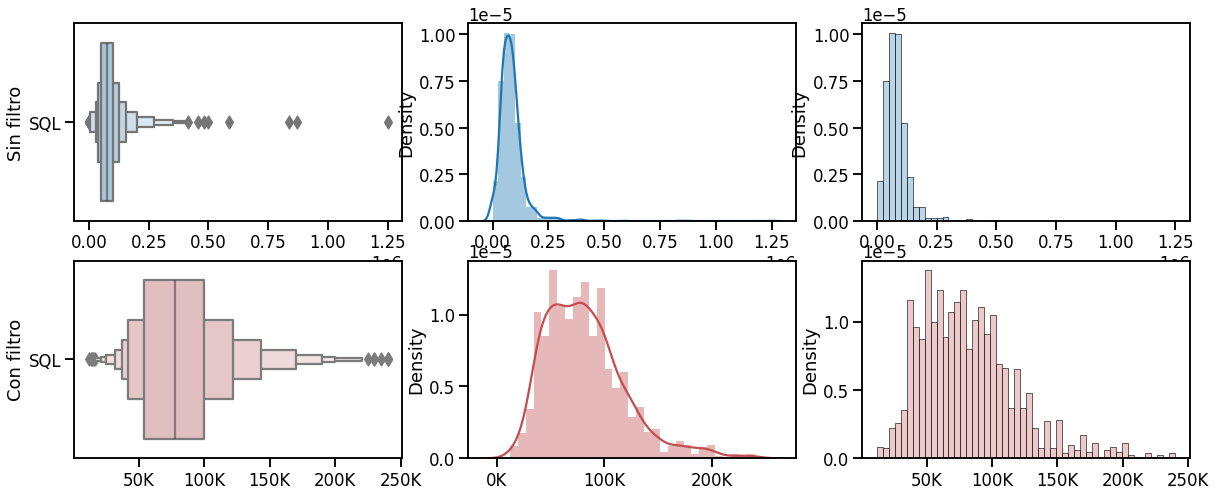

In [ ]:
#D.1 Muestra sin ningun filtro (azul)
_sql = _df_filter[_df_filter['tools_programming_languages']=='SQL']
_sql = _sql.rename(columns={'salary_monthly_NETO':'Salary Monthly Neto','tools_programming_languages':'Sin filtro'})
#D.2 Muestra filtrada por smvym y sin outliers (rojo)
_sql_s = df_wn[df_wn['tools_programming_languages']=='SQL']
_sql_s = _sql_s.rename(columns={'salary_monthly_NETO':'Salary Monthly Neto','tools_programming_languages':'Con filtro'})
#Gráfico Seaborn
sns.set_color_codes("deep")
fig, axes = plt.subplots(figsize=(20, 8), ncols=3, nrows=2)

g1 = sns.boxenplot(x=_sql["Salary Monthly Neto"],y=_sql['Sin filtro'],ax=axes[0,0], color ='#A4C7E1')
g1.set(xlabel=None)  # remove the axis label
g1 = sns.distplot(x=_sql[['Salary Monthly Neto']],ax=axes[0,1])
g1 = sns.histplot(x=_sql['Salary Monthly Neto'], color='#A4C7E1', bins=50,ax=axes[0,2], legend=False,stat='density')
g1.set(xlabel=None)  # remove the axis label

g2 = sns.boxenplot(x=_sql_s["Salary Monthly Neto"],y=_sql_s['Con filtro'],ax=axes[1,0], color ='#E7B8B9')
g2.set(xlabel=None)  # remove the axis label
g2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in g2.get_xticks()/1000]) #x format
g2 = sns.distplot(x=_sql_s[['Salary Monthly Neto']],ax=axes[1,1], color ='r')
g2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in g2.get_xticks()/1000])#x format
g2 = sns.histplot(x=_sql_s['Salary Monthly Neto'], color='#E7B8B9', bins=50,ax=axes[1,2], legend=False,stat='density')
g2.set(xlabel=None)  # remove the axis label
g2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in g2.get_xticks()/1000])#x format

In [ ]:
#Estadistica desciptiva del salario mensual neto para SQL 
_sql = _sql.rename(columns={'Salary Monthly Neto':'Sin filtros'})
_sql = _sql[['Sin filtros']].describe().round()
_sql_s = _sql_s.rename(columns={'Salary Monthly Neto':'Con filtros'})
_sql_s = _sql_s[['Con filtros']].describe().round()
_sql['Con filtros'] = _sql_s['Con filtros']
_sql

,Sin filtros,Con filtros
count,"1,896.000","1,784.000"
mean,"85,153.000","82,012.000"
std,"64,752.000","37,302.000"
min,17.000,"12,000.000"
25%,"51,500.000","53,988.000"
50%,"76,000.000","77,572.000"
75%,"102,000.000","100,000.000"
max,"1,250,000.000","240,000.000"


E. HTML

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0, '0K'),
 Text(0, 0, '50K'),
 Text(0, 0, '100K'),
 Text(0, 0, '150K'),
 Text(0, 0, '200K'),
 Text(0, 0, '250K'),
 Text(0, 0, '300K')]

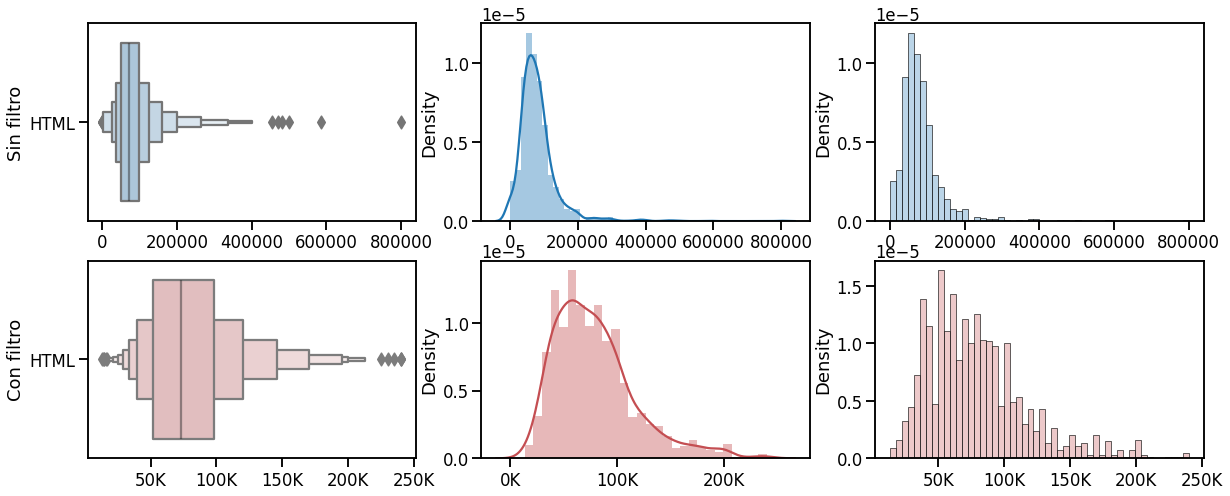

In [ ]:
#E.1 Muestra sin ningun filtro (azul)
_html = _df_filter[_df_filter['tools_programming_languages']=='HTML']
_html = _html.rename(columns={'salary_monthly_NETO':'Salary Monthly Neto','tools_programming_languages':'Sin filtro'})
#E.2 Muestra filtrada por smvym y sin outliers (rojo)
_html_s = df_wn[df_wn['tools_programming_languages']=='HTML']
_html_s = _html_s.rename(columns={'salary_monthly_NETO':'Salary Monthly Neto','tools_programming_languages':'Con filtro'})
#Gráfico Seaborn
sns.set_color_codes("deep")
fig, axes = plt.subplots(figsize=(20, 8), ncols=3, nrows=2)

g1 = sns.boxenplot(x=_html["Salary Monthly Neto"],y=_html['Sin filtro'],ax=axes[0,0], color ='#A4C7E1')
g1.set(xlabel=None)  # remove the axis label
g1 = sns.distplot(x=_html[['Salary Monthly Neto']],ax=axes[0,1])
g1 = sns.histplot(x=_html['Salary Monthly Neto'], color='#A4C7E1', bins=50,ax=axes[0,2], legend=False,stat='density')
g1.set(xlabel=None)  # remove the axis label

g2 = sns.boxenplot(x=_html_s["Salary Monthly Neto"],y=_html_s['Con filtro'],ax=axes[1,0], color ='#E7B8B9')
g2.set(xlabel=None)  # remove the axis label
g2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in g2.get_xticks()/1000]) #x format
g2 = sns.distplot(x=_html_s[['Salary Monthly Neto']],ax=axes[1,1], color ='r')
g2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in g2.get_xticks()/1000])#x format
g2 = sns.histplot(x=_html_s['Salary Monthly Neto'], color='#E7B8B9', bins=50,ax=axes[1,2], legend=False,stat='density')
g2.set(xlabel=None)  # remove the axis label
g2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in g2.get_xticks()/1000])#x format

In [ ]:
#Estadistica desciptiva del salario mensual neto para SQL 
_html = _html.rename(columns={'Salary Monthly Neto':'Sin filtros'})
_html = _html[['Sin filtros']].describe().round()
_html_s = _html_s.rename(columns={'Salary Monthly Neto':'Con filtros'})
_html_s = _html_s[['Con filtros']].describe().round()
_html['Con filtros'] = _html_s['Con filtros']
_html

,Sin filtros,Con filtros
count,"1,596.000","1,495.000"
mean,"81,056.000","78,877.000"
std,"57,923.000","37,958.000"
min,13.000,"13,500.000"
25%,"50,000.000","51,480.000"
50%,"71,016.000","73,000.000"
75%,"98,850.000","98,000.000"
max,"800,000.000","240,000.000"


#Ejercicio 2 - Densidades y varias varialbes
Responder a la pregunta general: ¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?

Para ello considere (igual al ejercicio Anterior):

Seleccionar las columnas relevantes para analizar.
Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.


Las columnas reelevantes fueron descriptas en el apartado 1.1; y el tratamiento de las filas en el apartado 1.2

In [ ]:
## DataFrame
df_wn.info()
df_wn[:4]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7726 entries, 5691 to 2380
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   salary_monthly_NETO          7726 non-null   float64
 1   tools_programming_languages  7726 non-null   object 
 2   profile_gender               7726 non-null   object 
 3   work_contract_type           7726 non-null   object 
 4   profile_studies_level        7726 non-null   object 
 5   company_employee_number      7726 non-null   object 
 6   work_people_in_charge_of     7726 non-null   int64  
 7   salary_monthly_BRUTO         7726 non-null   float64
 8   work_years_in_company        7726 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 603.6+ KB


,salary_monthly_NETO,tools_programming_languages,profile_gender,work_contract_type,profile_studies_level,company_employee_number,work_people_in_charge_of,salary_monthly_BRUTO,work_years_in_company
5691,"12,000.000",Java,Hombre,Part-Time,Universitario,1-10,0,"15,000.000",1.000
5692,"12,000.000",SQL,Hombre,Part-Time,Universitario,1-10,0,"15,000.000",1.000
11803,"13,500.000",SQL,Hombre,Part-Time,Universitario,11-50,1,"16,000.000",2.000
11802,"13,500.000",Javascript,Hombre,Part-Time,Universitario,11-50,1,"16,000.000",2.000


#a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos?

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa

###a) 1. Análisis para variables categóricas:
TABLA DE CONTINGENCIA

Variables categóricas: 
[profile_studies_level]  [tools_programming_languages]

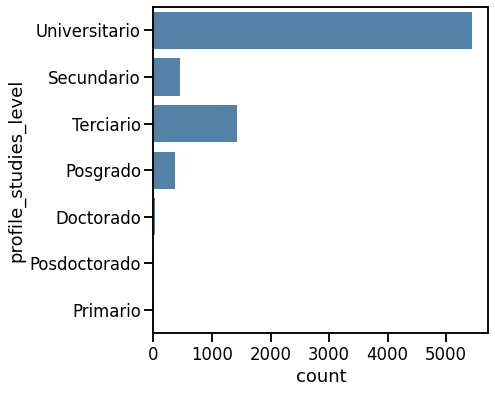

In [ ]:
#profile_studies_level, frecuencias
fig = plt.figure(figsize=(6, 6))
sns.countplot(y=df_wn.profile_studies_level, color='steelblue')

In [ ]:
## ORDENAR LAS CATEGORÍAS 
studies_levels_ = ['Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado']

In [ ]:
# Lenguajes de programación más populares seleccionados en el apartado 1.
pd.crosstab(df_wn.tools_programming_languages, df_wn.profile_studies_level)#, normalize=True)

profile_studies_level,Doctorado,Posdoctorado,Posgrado,Primario,Secundario,Terciario,Universitario
tools_programming_languages,,,,,,,
HTML,2,0,55,0,101,324,1013
Java,6,1,62,1,57,200,907
Javascript,5,1,62,0,127,396,1412
Python,13,1,84,0,75,162,875
SQL,8,0,99,1,88,347,1241


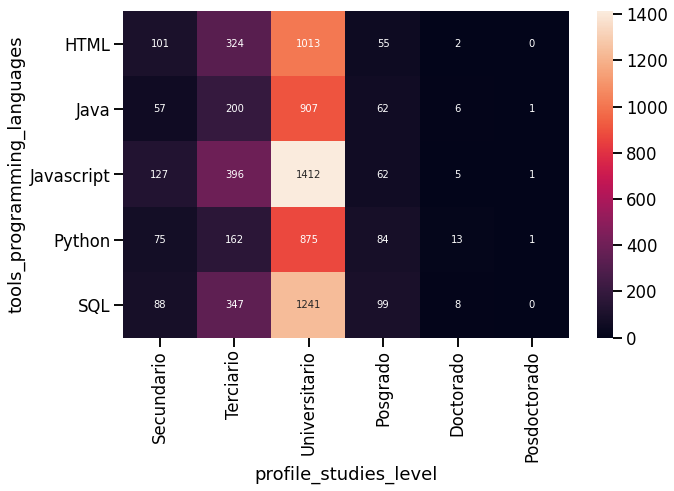

In [ ]:
fig = plt.figure(figsize=(10,6))
exp = pd.crosstab(df_wn.tools_programming_languages,
                  df_wn.profile_studies_level)[studies_levels_]

sns.heatmap(exp, annot=True, fmt='g')

En este gráfico se presenta una intersección de situaciones entre variables de tipo categóricas, el cual resalta el cruce Javascript y universitario, siendo el valor de más alta frecuencia. 
Se observa que este heatmap que la categoría "Universidad" está demasiado densa, lo que hace que practicamente sean imperceptibles los demás niveles educativos de interés, posgrado y doctorado por ejemplo.

###a) 2. Análisis para variables numéricas: 


Variables categóricas: "profile_gender" "tools_programming_languages"  

Variables numéricas: "salary_monthly_NETO" - "work_people_in_charge_of" - "work_years_in_company" 

Analizamos la distribución de las siguientes variables:

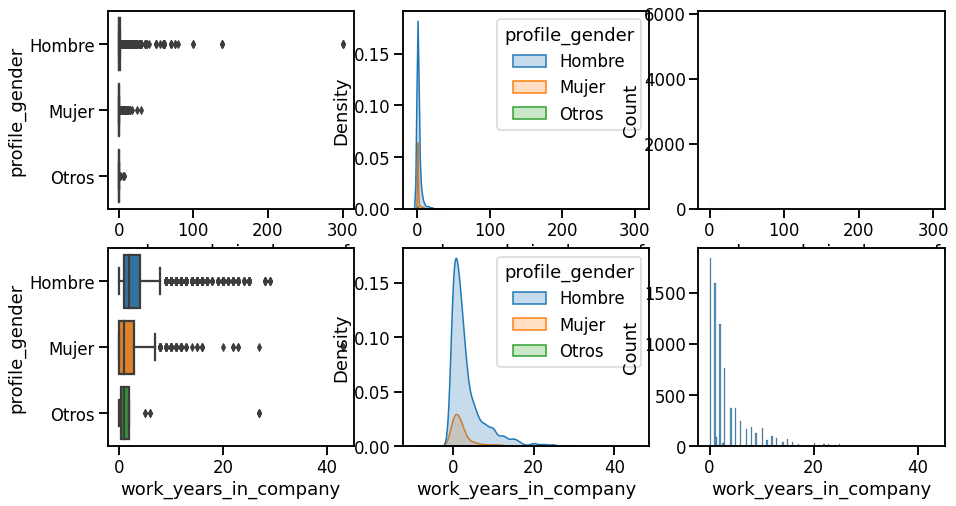

In [ ]:
fig, axes = plt.subplots(figsize=(15, 8), ncols=3, nrows=2)
sns.boxplot(x="work_people_in_charge_of" , y="profile_gender", data= df_wn, ax=axes[0,0])
sns.kdeplot(
   data=df_wn, x="work_people_in_charge_of", hue="profile_gender",shade=True,ax=axes[0,1])
sns.histplot(data=df_wn, x="work_people_in_charge_of",ax=axes[0,2])
sns.boxplot(x="work_years_in_company" , y="profile_gender", data= df_wn, ax=axes[1,0])
sns.kdeplot(
   data=df_wn, x="work_years_in_company", hue="profile_gender",shade=True,ax=axes[1,1])
sns.histplot(data=df_wn, x="work_years_in_company",ax=axes[1,2])

Podemos observar que existen valores atípicos en las variables "work_years_in_company" y "work_people_in_charge_of". 

In [ ]:
##Corregimos los outliers de la variable "work_people_in_charge_of".

sd_wn=(2.5 * df_wn["work_people_in_charge_of"].std())
media_wn=(df_wn["work_people_in_charge_of"].mean())
sd_highlim=media_wn+sd_wn
sd_lowlim=media_wn-sd_wn
##Definimos un data frame con estas correcciones
df_wpch=df_wn[(df_wn["work_people_in_charge_of"]<=(sd_highlim)) & (df_wn["work_people_in_charge_of"]>=(sd_lowlim))]

##Corregimos los outliers de la variable "work_years_in_company".
sd_wy=(2.5 * df_wn["work_years_in_company"].std())
media_wy=(df_wn["work_years_in_company"].mean())
sdy_highlim=media_wy+sd_wy
sdy_lowlim=media_wy-sd_wy
##Definimos un data frame con estas correcciones
df_wyc=df_wn[(df_wn["work_people_in_charge_of"]<=(sdy_highlim)) & (df_wn["work_people_in_charge_of"]>=(sdy_lowlim))]

##Unimos nuestra base
df_wn2=pd.concat([df_wpch, df_wyc], axis=0)
df_wn2

,salary_monthly_NETO,tools_programming_languages,profile_gender,work_contract_type,profile_studies_level,company_employee_number,work_people_in_charge_of,salary_monthly_BRUTO,work_years_in_company
5691,"12,000.000",Java,Hombre,Part-Time,Universitario,1-10,0,"15,000.000",1.000
5692,"12,000.000",SQL,Hombre,Part-Time,Universitario,1-10,0,"15,000.000",1.000
11803,"13,500.000",SQL,Hombre,Part-Time,Universitario,11-50,1,"16,000.000",2.000
11802,"13,500.000",Javascript,Hombre,Part-Time,Universitario,11-50,1,"16,000.000",2.000
11801,"13,500.000",HTML,Hombre,Part-Time,Universitario,11-50,1,"16,000.000",2.000
...,...,...,...,...,...,...,...,...,...
13308,"240,000.000",Python,Hombre,Full-Time,Universitario,10001+,0,"440,000.000",6.000
13310,"240,000.000",SQL,Hombre,Full-Time,Universitario,10001+,0,"440,000.000",6.000
2379,"248,000.000",Javascript,Hombre,Full-Time,Universitario,10001+,0,"362,000.000",0.000
12563,"248,000.000",Python,Hombre,Full-Time,Universitario,501-1000,8,"338,000.000",7.000


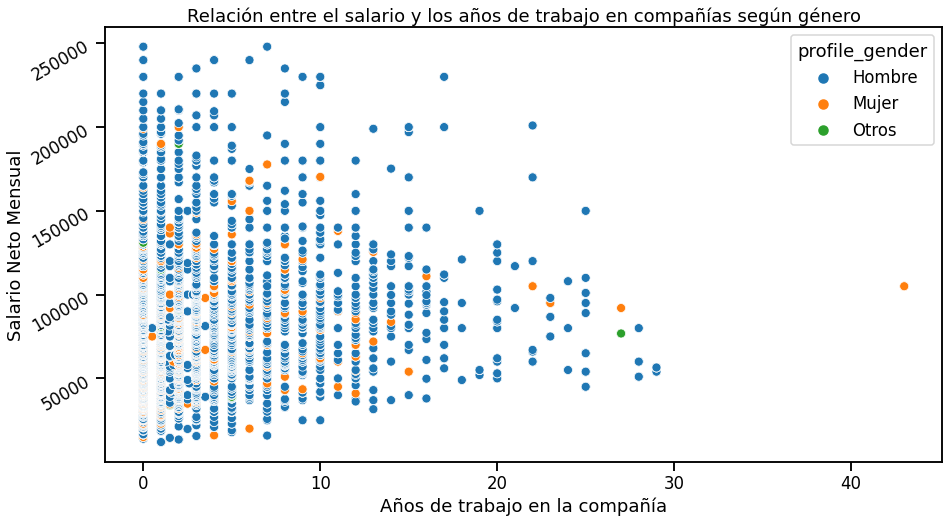

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_wn2, x="work_years_in_company", y='salary_monthly_NETO', hue='profile_gender')
plt.title('Relación entre el salario y los años de trabajo en compañías según género')
plt.ylabel('Salario Neto Mensual')
plt.xlabel('Años de trabajo en la compañía')
plt.yticks(rotation=30)
plt.ticklabel_format(style='plain', axis='x')

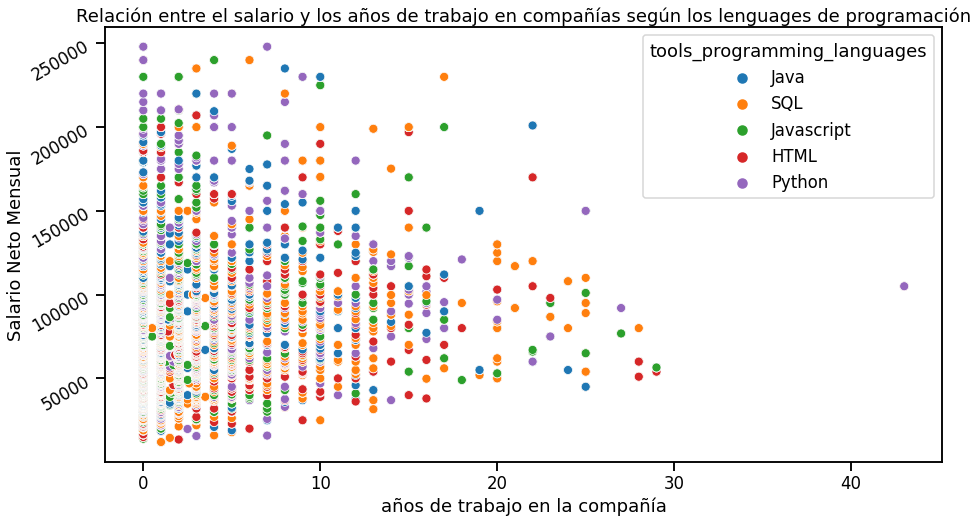

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_wn2, x="work_years_in_company", y='salary_monthly_NETO', hue='tools_programming_languages')
plt.title('Relación entre el salario y los años de trabajo en compañías según los lenguages de programación')
plt.ylabel('Salario Neto Mensual')
plt.xlabel('años de trabajo en la compañía')
plt.yticks(rotation=30)
plt.ticklabel_format(style='plain', axis='x')

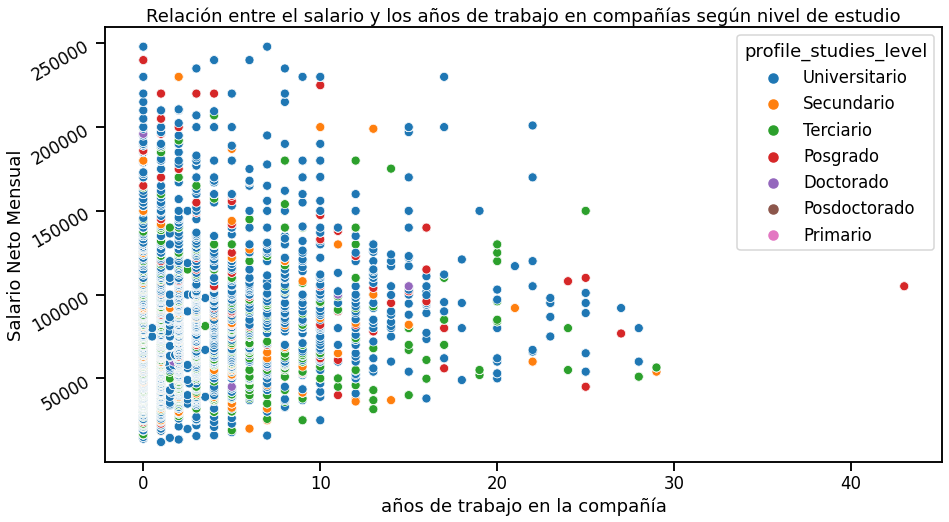

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_wn2, x="work_years_in_company", y='salary_monthly_NETO', hue='profile_studies_level')
plt.title('Relación entre el salario y los años de trabajo en compañías según nivel de estudio')
plt.ylabel('Salario Neto Mensual')
plt.xlabel('años de trabajo en la compañía')
plt.yticks(rotation=30)
plt.ticklabel_format(style='plain', axis='x')

# b) Asociación
Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple. ¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría

Para la variable salario neto y salario bruto utilizaremos un gráfico de scatter plot para una primer aproximación a su relación.Pero primero observemos si la variable salario bruto necesita corrección para sus outliers

b) 1. Visualización de la distribución de la variable: "salary_monthly_BRUTO"

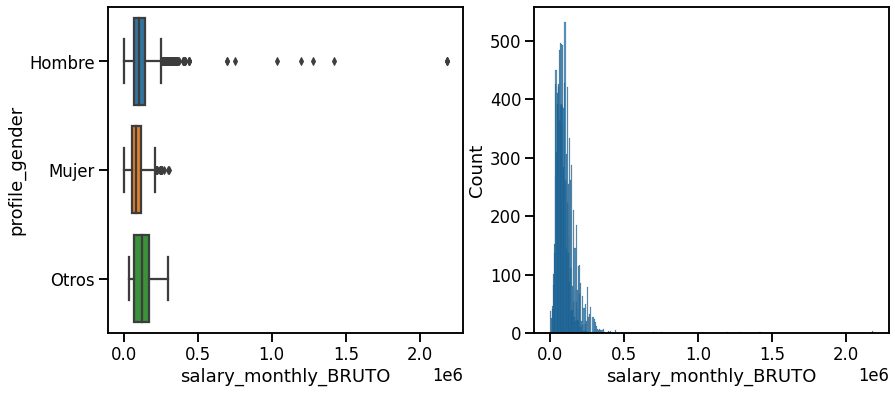

In [ ]:
fig, axes = plt.subplots(figsize=(14,6), ncols=2) 
sns.boxplot(x="salary_monthly_BRUTO" , y="profile_gender", data= df_wn, ax=axes[0])
sns.histplot(data=df_wn, x="salary_monthly_BRUTO",ax=axes[1])
sns.histplot(data=df_wn, x="salary_monthly_NETO",ax=axes[1])

b) 2. Corrección de la variable salario bruto.

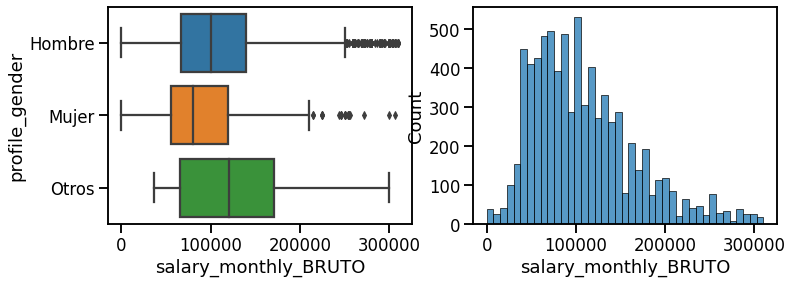

In [ ]:
##Corregimos los outliers de la variable "salary_monthly_BRUTO".

sd_sb=(2.5 * df_wn["salary_monthly_BRUTO"].std())
media_sb=(df_wn["salary_monthly_BRUTO"].mean())
sdb_highlim=media_sb+sd_sb
sdb_lowlim=media_sb-sd_sb
##Aplicamos las correcciones

df_B=df_wn[(df_wn["salary_monthly_BRUTO"]<=(sdb_highlim)) & (df_wn["salary_monthly_BRUTO"]>=(sdb_lowlim))]
## Visualizamos las variables con las correcciones realizadas:

fig, axes = plt.subplots(figsize=(12,4), ncols=2)
sns.boxplot(x="salary_monthly_BRUTO" , y="profile_gender", data= df_B, ax=axes[0])
sns.histplot(data=df_B, x="salary_monthly_BRUTO",ax=axes[1])

b) 3. Gráfico de Scatter Plot.

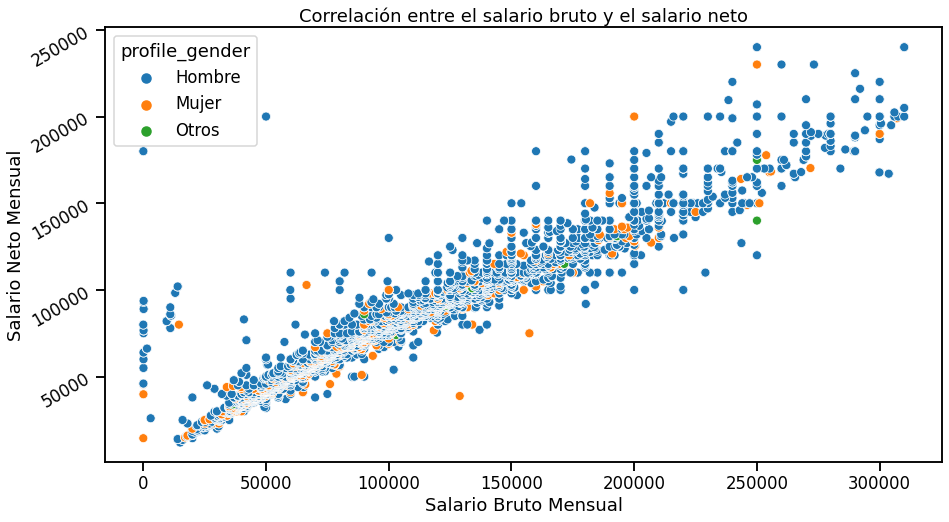

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_B, x="salary_monthly_BRUTO", y="salary_monthly_NETO", hue="profile_gender")
plt.title('Correlación entre el salario bruto y el salario neto')
plt.ylabel('Salario Neto Mensual')
plt.xlabel('Salario Bruto Mensual')
plt.yticks(rotation=30)
plt.ticklabel_format(style='plain', axis='x')

Se observa una correlación lineal positiva de asociación elevada entre el salario bruto mensual y el salario neto mensual. 

Existen algunas particularidades respecto a algunas observaciones que declaran tener mayor salario neto que salario bruto que puede indicar una confusión conceptual al momento de responder, o a la percepción de ingresos netos por horas no declaradas por el empleador, es decir horas trabajadas informalmente.

b) 4. Coeficiente de correlación

In [ ]:
# Estimamos la relación entre las variables

corr_mat=df_B.corr()
corr_mat.loc["salary_monthly_BRUTO", "salary_monthly_NETO"]

0.9546691273040915

0.9: significa una asociación muy alta.

El coeficiente de correlación tiene una fuerte relación lineal positiva entre estas variables. En términos de ingresos netos el salario bruto no genera información que no se encuentre ya contenida en la variable salario neto por lo que dada las características de la correlación podemos prescindir de esta variable.

#c) Densidad condicional
Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable 'salary_monthly_NETO' ¿Considera que ambas variables son independientes? ¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación

C) 1. Analizamos la variable Nivel de educación:

In [ ]:
df_wn[["profile_studies_level"]].value_counts()

profile_studies_level
Universitario            5448
Terciario                1429
Secundario                448
Posgrado                  362
Doctorado                  34
Posdoctorado                3
Primario                    2
dtype: int64

C) 2. Subpoblaciones: Terciario y Posgrado

In [ ]:
df_T=df_wn[(df_wn['profile_studies_level'] == "Terciario")]
df_P=df_wn[(df_wn['profile_studies_level'] != "Terciario")& (df_wn['profile_studies_level'] != "Universitario")]

C) 3. Gráficos comparativos de ambos histogramas de la variable 'salary_monthly_NETO' 

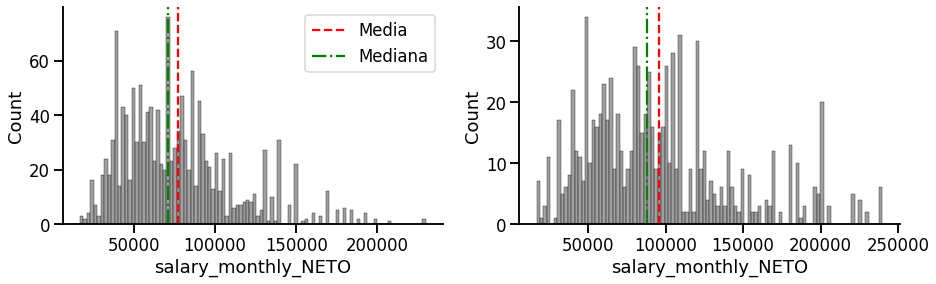

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
sns.histplot(data=df_T, x="salary_monthly_NETO", bins=100,color='gray',ax=axes[0])
axes[0].axvline(df_T["salary_monthly_NETO"].mean(), color='red',
            linestyle='--', label='Media')
axes[0].axvline(df_T["salary_monthly_NETO"].median(), color='green',
            linestyle='-.', label='Mediana')

sns.histplot(data= df_P, x="salary_monthly_NETO", bins=100,color='gray' ,ax=axes[1])
axes[1].axvline(df_P["salary_monthly_NETO"].mean(), color='red',
            linestyle='--', label='Media')
axes[1].axvline(df_P["salary_monthly_NETO"].median(), color='green',
            linestyle='-.', label='Mediana')

axes[0].legend()
sns.despine()

Podemos observar que existe una relación directa entre las medidas de centralización del salario neto para las poblaciones seleccionadas. La media y la mediana del salario neto son menores en la población cuyo perfil de estudio es terciario, respecto a aquella población cuyo perfil de estudio es de posgrado. Una visualización útil podrías lograrse a través del gráfico de caja y mediante la fundicón de densidad.

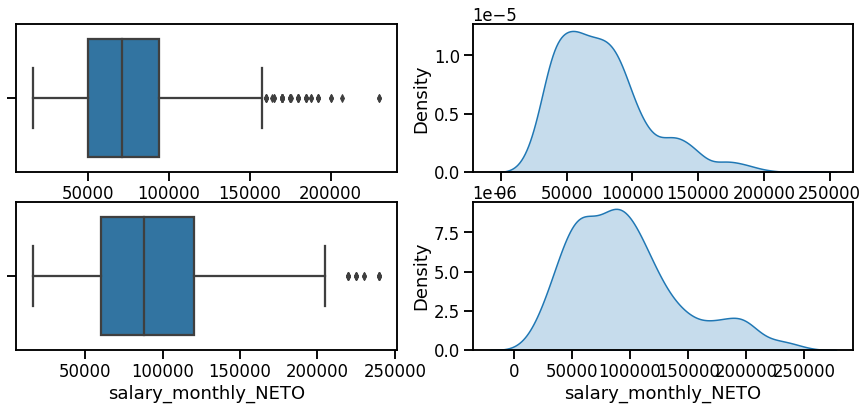

In [ ]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(15, 6))
sns.boxplot(data=df_T, x="salary_monthly_NETO" ,ax=axes[0,0])
sns.kdeplot(data=df_T, x="salary_monthly_NETO",shade=True ,ax=axes[0,1])
sns.boxplot(data=df_P, x="salary_monthly_NETO" ,ax=axes[1,0])
sns.kdeplot(data=df_P, x="salary_monthly_NETO",shade=True ,ax=axes[1,1])

C) 4. En el siguiente gráfico se obervan las distribuciónes del salario neto en relación a las subpoblaciones del nivel educativo: Terciario y Posgrado 

In [ ]:
salary_col='salary_monthly_NETO'

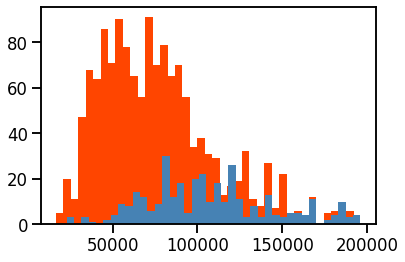

In [ ]:
filtered_df= df_wn[df_wn[salary_col] < 200000]
df_T= filtered_df[ filtered_df['profile_studies_level']=='Terciario']
df_P=filtered_df[ filtered_df['profile_studies_level']=='Posgrado']

plt.hist(df_T[salary_col], color='orangered', bins=40)
plt.hist(df_P[salary_col], color='steelblue', bins=40)
plt.show()

C) 5. Medidas de centralización:

In [ ]:
#Educación Terciaria: Medidas de centralización
print("Media Salario medio neto educación terciaria",
      (df_T["salary_monthly_NETO"].mean()))
print("Mediana Salario medio neto educación terciaria",
      (df_T["salary_monthly_NETO"].median()))

#Educación Posgrado: Medidas de centralización
print("Media Salario medio neto educación posgrado",
      (df_P["salary_monthly_NETO"].mean()))
print("Mediana Salario medio neto educación posgrado",
      (df_P["salary_monthly_NETO"].median()))

Media Salario medio neto educación terciaria 76685.81169241574
Mediana Salario medio neto educación terciaria 71000.0
Media Salario medio neto educación posgrado 107425.82304477612
Mediana Salario medio neto educación posgrado 105000.0


C) 5. Medidas de dispersión:

In [ ]:
import scipy

print("Coeficiente de variación salario neto educacion terciaria",
      scipy.stats.variation(df_T.salary_monthly_NETO))
print("Coeficiente de variación salario neto educacion posgrado",
      scipy.stats.variation(df_P.salary_monthly_NETO.dropna()))

Coeficiente de variación salario neto educacion terciaria 0.44739194189524306
Coeficiente de variación salario neto educacion posgrado 0.348279947014822


Las medidas de centralización son mayores para la subpoblación con nivel educativo de posgrado mientras que la variación de esta subpoblación es menor respecto a la subpoblación de eduación terciaria.

#d) Densidad Conjunta condicional
Elija dos variables numéricas y una categórica. Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)

Vamos a elegir las variables personas a cargo en el trabajo y años de trabajo en la compañía.


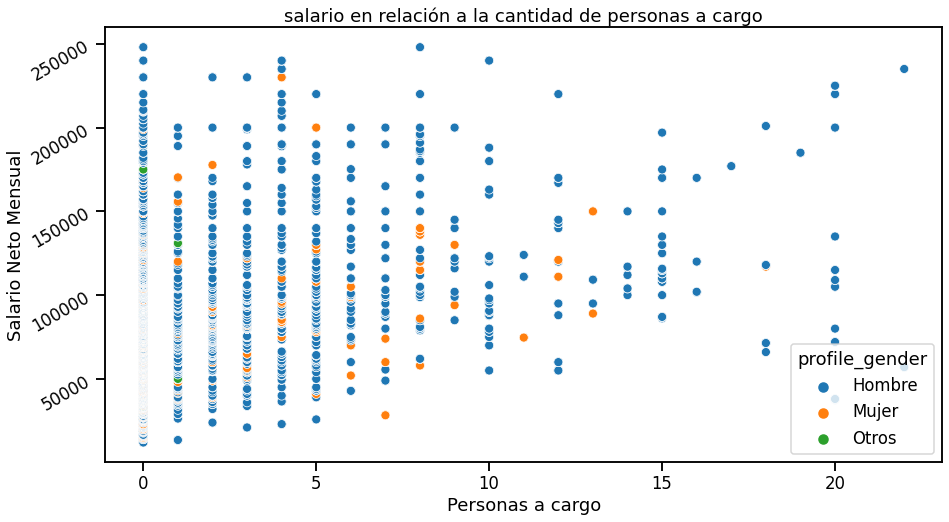

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_wn2, x="work_people_in_charge_of", y="salary_monthly_NETO", hue="profile_gender")
plt.title('salario en relación a la cantidad de personas a cargo')
plt.ylabel('Salario Neto Mensual')
plt.xlabel('Personas a cargo')
plt.yticks(rotation=30)
plt.ticklabel_format(style='plain', axis='x')

Al analizar la relación entre el salario y las personas a cargo, se observa una leve tendencia positiva, sin embargo no se observa con claridad una asociación entre ambas variables con el género. 

Por consiguiente, nos interesa analizar que proporción de mujeres con trabajo Full-time y nivel educativo mínimo terciario tiene trabajadores a cargo.
Para ello cargamos una base nueva conformada por mujeres que cumplan estas condiciones.

In [ ]:
df_h=df_wn[(df_wn ['work_contract_type'] =="Full-Time") & (df_wn['profile_studies_level'] != "Secundario")& (df_wn ['profile_studies_level'] != "Primario")]
df_h[['profile_gender', 'work_people_in_charge_of']].groupby('profile_gender').count()
df_h["personas_cargo"]= np.where(df_h['work_people_in_charge_of']>=0, 'Si', 'No')
df_h

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,salary_monthly_NETO,tools_programming_languages,profile_gender,work_contract_type,profile_studies_level,company_employee_number,work_people_in_charge_of,salary_monthly_BRUTO,work_years_in_company,personas_cargo
8010,"23,912.000",Javascript,Hombre,Full-Time,Universitario,501-1000,2,"23,855.000",4.000,Si
8009,"23,912.000",HTML,Hombre,Full-Time,Universitario,501-1000,2,"23,855.000",4.000,Si
15465,"24,000.000",SQL,Hombre,Full-Time,Universitario,1-10,0,"25,300.000",1.000,Si
7243,"25,000.000",HTML,Hombre,Full-Time,Universitario,1-10,0,"32,000.000",3.000,Si
7246,"25,000.000",Python,Hombre,Full-Time,Universitario,1-10,0,"32,000.000",3.000,Si
...,...,...,...,...,...,...,...,...,...,...
13308,"240,000.000",Python,Hombre,Full-Time,Universitario,10001+,0,"440,000.000",6.000,Si
13310,"240,000.000",SQL,Hombre,Full-Time,Universitario,10001+,0,"440,000.000",6.000,Si
2379,"248,000.000",Javascript,Hombre,Full-Time,Universitario,10001+,0,"362,000.000",0.000,Si
12563,"248,000.000",Python,Hombre,Full-Time,Universitario,501-1000,8,"338,000.000",7.000,Si


In [ ]:
df_n=df_h[['profile_gender', 'work_people_in_charge_of']].groupby('profile_gender').count()
df_n1=df_wn[['profile_gender','work_contract_type']].groupby('profile_gender').count()
df_n2= pd.merge(df_n, df_n1, how="left", on="profile_gender")
df_n2['Frec_jer']=(df_n2["work_contract_type"]/df_n2["work_people_in_charge_of"]*100)
df_n2

,work_people_in_charge_of,work_contract_type,Frec_jer
profile_gender,,,
Hombre,5893,6690,113.525
Mujer,868,993,114.401
Otros,42,43,102.381


In [ ]:
df_hm=df_wn[(df_wn ['work_contract_type'] =="Full-Time") & (df_wn ['profile_studies_level'] != "Secundario")& (df_wn ['profile_studies_level'] != "Primario")& (df_wn ['profile_gender'] == "Mujer")]
df_hm

,salary_monthly_NETO,tools_programming_languages,profile_gender,work_contract_type,profile_studies_level,company_employee_number,work_people_in_charge_of,salary_monthly_BRUTO,work_years_in_company
15220,"25,000.000",HTML,Mujer,Full-Time,Universitario,11-50,0,"25,000.000",0.000
7622,"28,271.000",HTML,Mujer,Full-Time,Universitario,11-50,7,"32,000.000",1.000
7624,"28,271.000",Javascript,Mujer,Full-Time,Universitario,11-50,7,"32,000.000",1.000
7623,"28,271.000",Java,Mujer,Full-Time,Universitario,11-50,7,"32,000.000",1.000
3073,"30,000.000",Javascript,Mujer,Full-Time,Universitario,51-100,0,"38,000.000",0.000
...,...,...,...,...,...,...,...,...,...
9222,"200,000.000",Javascript,Mujer,Full-Time,Posgrado,201-500,5,"200,000.000",2.000
9220,"200,000.000",HTML,Mujer,Full-Time,Posgrado,201-500,5,"200,000.000",2.000
9224,"200,000.000",SQL,Mujer,Full-Time,Posgrado,201-500,5,"200,000.000",2.000
12941,"230,000.000",Python,Mujer,Full-Time,Terciario,11-50,4,"250,000.000",2.000
